In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq, ifft
from sklearn.decomposition import PCA

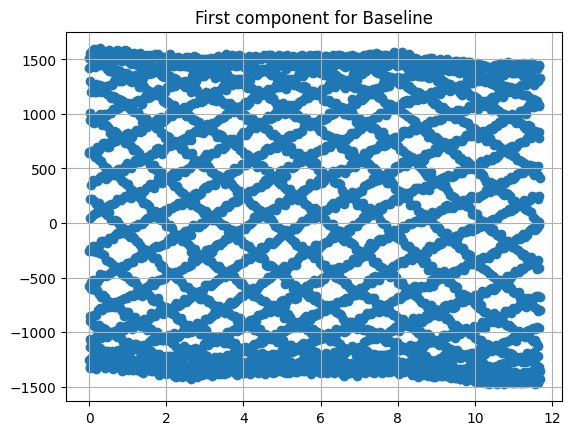

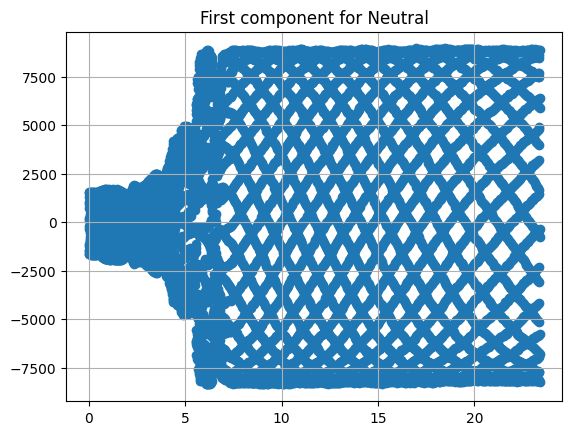

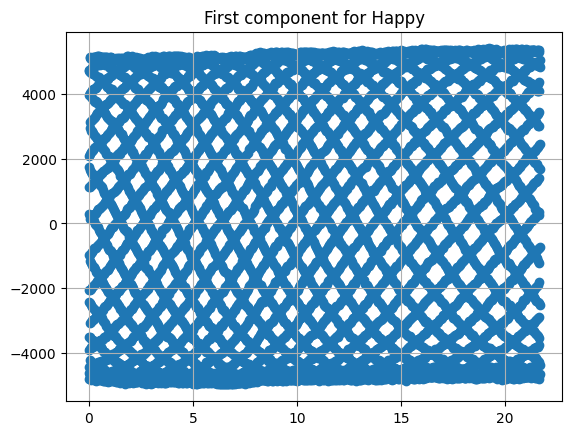

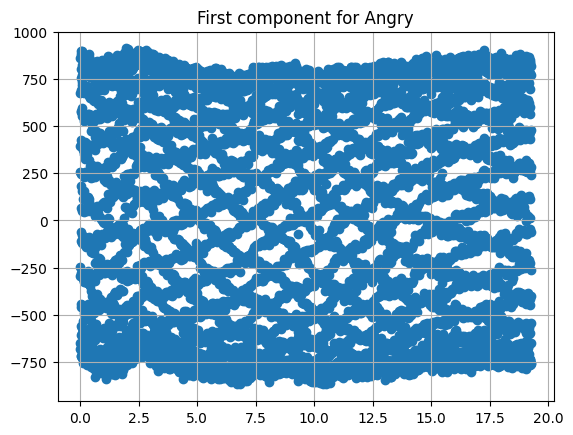

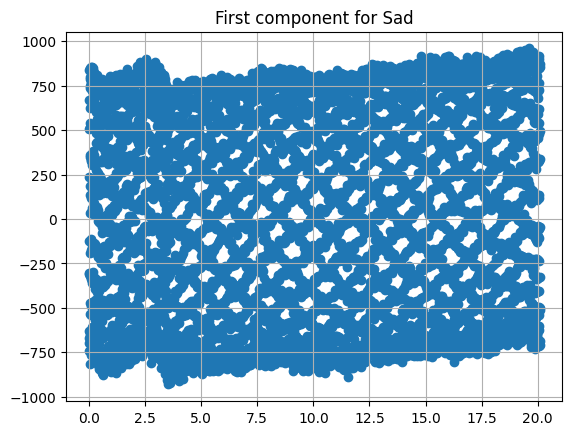

In [2]:
def graph(filename, name):
    data = pd.read_csv(filename)
    cols = data.columns
    times = data["TimeStamp"]
    times = times - times[0]
    cols = [col for col in cols if col != "TimeStamp"]

    X = data[cols].values
    num_components=4
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X)
    # data_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    # data_pca.to_csv('your_reduced_data_file.csv', index=False)

    # print(times.shape)
    # print((X_pca[:, 0]).shape)
    plt.scatter(times, X_pca[:, 0])
    # for i in range(num_components):
    #     plt.scatter(times, X_pca[:, i])
    plt.title(f"First component for {name}")
    plt.grid()
    plt.show()

graph('Our Recorded Data/Ilia EEG Data/Ilia Baseline 1_ExG.csv', "Baseline")
graph('Our Recorded Data/Ilia EEG Data/R1 Ilia Neutral 1_ExG.csv', "Neutral")
graph('Our Recorded Data/Ilia EEG Data/R2 Ilia Happy 1_ExG.csv', "Happy")
graph('Our Recorded Data/Ilia EEG Data/R8 Ilia Angry_ExG.csv', "Angry")
graph('Our Recorded Data/Ilia EEG Data/R6 Ilia Sad 2_ExG.csv', "Sad")

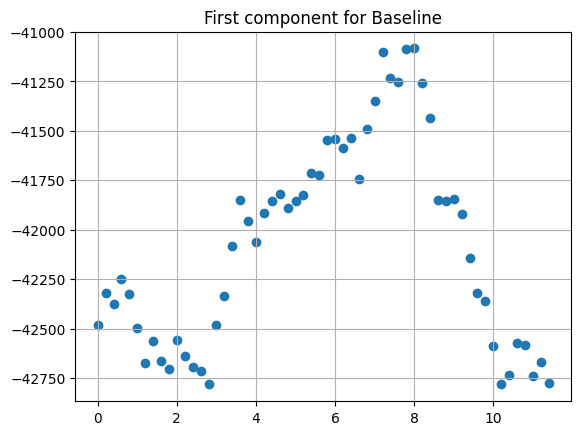

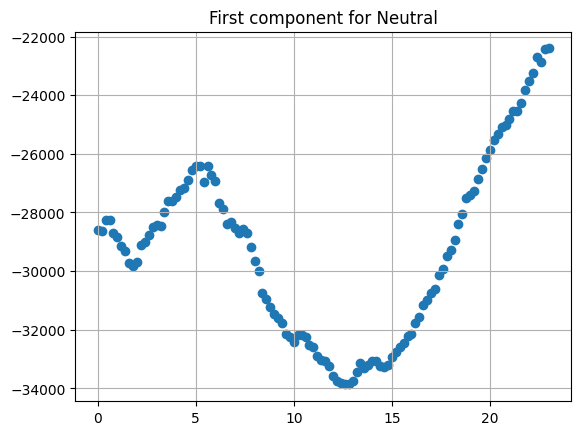

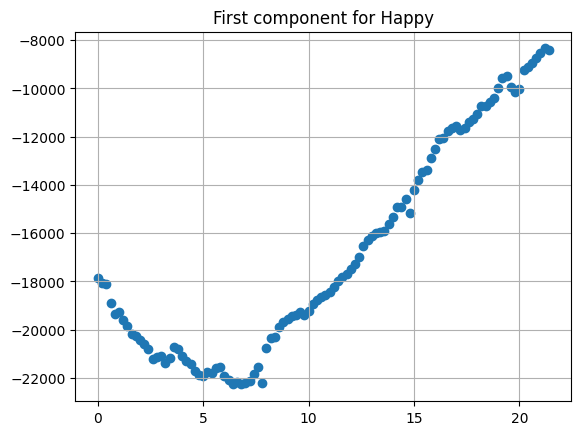

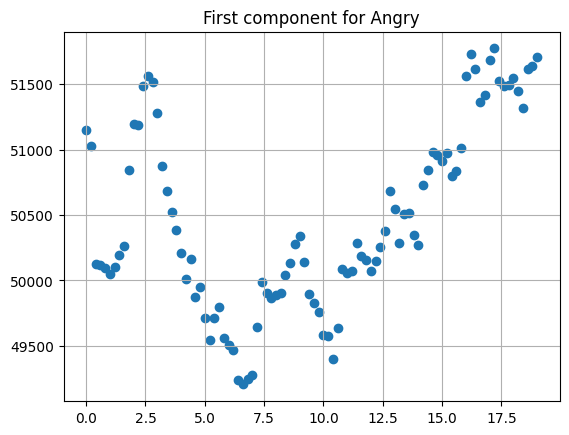

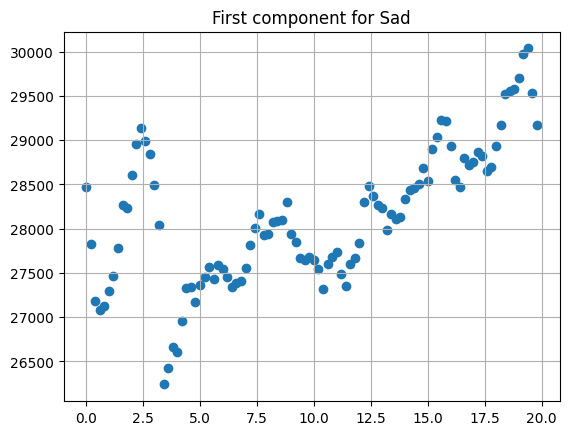

In [3]:
# Use the same PCA for all datasets
num_components=4
pca = PCA(n_components=num_components)

# Build the dataset to train on

to_use = []
import math

def make_clusters(times, X):
    size = 100
    n = X.shape[0]
    num_sections = math.ceil(n / size)
    X_split = np.split(np.resize(X, (num_sections * size, X.shape[1])), num_sections)
    if n % size != 0:
        # Remove the last, smaller entry
        X_split = X_split[:-1]
    X_split = np.array(X_split)
    X_split = np.resize(X_split, (X_split.shape[0], X_split.shape[1] * X_split.shape[2]))
    indices = np.arange(start=0, stop=n-n%size, step=size)
    use_times = times[indices]
    return use_times, np.array(X_split)

def graph(filename, name):
    data = pd.read_csv(filename)
    cols = data.columns
    times = data["TimeStamp"]
    times = times - times[0]
    cols = [col for col in cols if col != "TimeStamp"]
    X = data[cols].values
    times, X = make_clusters(times, X)
    to_use.append((name, times, X))

def done():
    # Actually transform and graph the data
    X_combined = [X for _, _, X in to_use]
    X_combined = np.concatenate(X_combined, axis=0)
    pca.fit(X_combined)
    for name, times, X in to_use:
        X_pca = pca.transform(X)
        plt.scatter(times, X_pca[:, 0])
        plt.title(f"First component for {name}")
        plt.grid()
        plt.show()

graph('Our Recorded Data/Ilia EEG Data/Ilia Baseline 1_ExG.csv', "Baseline")
graph('Our Recorded Data/Ilia EEG Data/R1 Ilia Neutral 1_ExG.csv', "Neutral")
graph('Our Recorded Data/Ilia EEG Data/R2 Ilia Happy 1_ExG.csv', "Happy")
graph('Our Recorded Data/Ilia EEG Data/R8 Ilia Angry_ExG.csv', "Angry")
graph('Our Recorded Data/Ilia EEG Data/R6 Ilia Sad 2_ExG.csv', "Sad")

done()